### Stochastic GW signals -  correlation 

Try to simulate as noise signal in a narrow freq band. 
Construct two separate time signals to act as two separate detectors sensitive at the same. Add (different) random noise into each and gradually(?) add the GW signal. Calculate the correlation between the detectors at each point (should be ~0 at the start - only noise).



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
%matplotlib inline



#implement a time period of 1 second with 500 samples ie. sample frequency 500Hz 
sample_freq = 500
time_step = 1/sample_freq

time_series_1 = np.arange(0,1,time_step)

#a second time series of the same size
time_series_2 = np.arange(2,3,time_step)


################################
#impliment random noise
#a random number array is generated with floats between 0 and 1 for each position of the time series

nse_1 = np.random.random(size=len(time_series_1))
nse_2 = np.random.random(size=len(time_series_2))

#the "output" of each detector is the total signal 
detect_1 = nse_1
detect_2 = nse_2



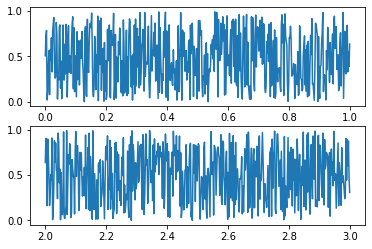

In [3]:
#Plot of the two detectors with only the (different) random noise included

fig, (ax1 ,ax2) = plt.subplots(nrows=2)
ax1.plot(time_series_1,nse_1)
ax2.plot(time_series_2,nse_2)

In [4]:
#Take (naïvely) the GW signal to be another simple array of random noise - x2 the background amp

randGW = 1 * np.random.random(size=len(time_series_1))


In [5]:
#Correlation - calc the correlation coefficient between the "output" of the two detectors 

#Correlation with only noise - should be ~0

corr_noise = stats.pearsonr(detect_1,detect_2)
print(corr_noise[0])

#the output of this changes every run if the random noise is unseeded (it seems to vary but be under ~|0.1|)

0.03232231618329825


In [6]:
#Add the GW sig to each deetector and find the correlation here

detect_1gw  = randGW + detect_1
detect_2gw  = randGW + detect_2

corr_fullsignal = stats.pearsonr(detect_1gw,detect_2gw)
print(corr_fullsignal[0])

0.5080189474781941


## Adding in GW sig slowly

In [7]:
total = 50
sig_strength = []
corr_fracsignal = []
for i in range(total+1):
    sig_strength.append(i/total)
    randGW_frac = randGW*sig_strength[i]
    detect_1gw  = randGW_frac + detect_1
    detect_2gw  = randGW_frac + detect_2
    
    corr_fracsignal.append((stats.pearsonr(detect_1gw,detect_2gw))[0])
    #print("GW sig strength = ",sig_strength[i], "\t cross corr = ",corr_fracsignal[i])
    

Text(0, 0.5, 'Pearson r statistic')

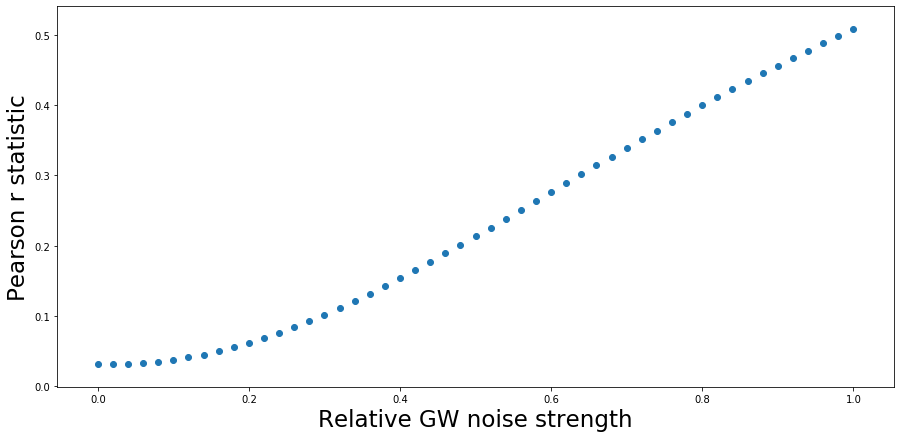

In [13]:
plt.figure(figsize=(15,7))


plt.scatter(sig_strength,corr_fracsignal)
plt.xlabel("Relative GW noise strength", fontsize = 23)
plt.ylabel("Pearson r statistic",fontsize = 23)